<a href="https://colab.research.google.com/github/BelemoualemChaimae/Diagnostic-of-diabete-/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define model
model = LogisticRegression()
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.8939393939393939


In [ ]:
from tensorflow.keras.models import load_model
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

In [ ]:
X_train_encode.shape

(670, 50)

In [ ]:
X_train.shape

(670, 100)

In [ ]:
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
acc = accuracy_score(y_test, yhat)
print(acc)

0.9212121212121213


Epoch 1/200
42/42 - 1s - loss: 0.0488 - val_loss: 0.0178
Epoch 2/200
42/42 - 0s - loss: 0.0138 - val_loss: 0.0089
Epoch 3/200
42/42 - 0s - loss: 0.0061 - val_loss: 0.0035
Epoch 4/200
42/42 - 0s - loss: 0.0025 - val_loss: 0.0018
Epoch 5/200
42/42 - 0s - loss: 0.0013 - val_loss: 9.4879e-04
Epoch 6/200
42/42 - 0s - loss: 7.7083e-04 - val_loss: 8.5166e-04
Epoch 7/200
42/42 - 0s - loss: 4.3938e-04 - val_loss: 3.0825e-04
Epoch 8/200
42/42 - 0s - loss: 2.8207e-04 - val_loss: 2.0761e-04
Epoch 9/200
42/42 - 0s - loss: 1.6952e-04 - val_loss: 1.5217e-04
Epoch 10/200
42/42 - 0s - loss: 1.1289e-04 - val_loss: 8.0852e-05
Epoch 11/200
42/42 - 0s - loss: 1.1106e-04 - val_loss: 8.0621e-05
Epoch 12/200
42/42 - 0s - loss: 8.5400e-05 - val_loss: 7.1752e-05
Epoch 13/200
42/42 - 0s - loss: 8.3979e-05 - val_loss: 6.7595e-05
Epoch 14/200
42/42 - 0s - loss: 5.9666e-05 - val_loss: 8.0964e-05
Epoch 15/200
42/42 - 0s - loss: 9.6837e-05 - val_loss: 1.1553e-04
Epoch 16/200
42/42 - 0s - loss: 9.3596e-05 - val_loss: 

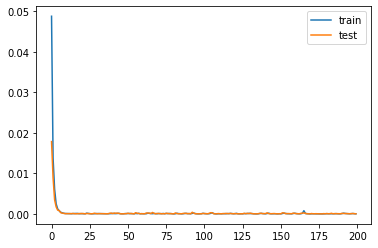

In [ ]:
# train autoencoder for classification with with compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')